In [1]:
from act.cell_model import ACTCellModel
from act.simulator import ACTSimulator
from act.act_types import SimulationParameters, CurrentInjection
from act.passive import ACTPassiveModule

import matplotlib.pyplot as plt
import numpy as np

from cell_builder import SSTcellbuilder

In [2]:
cell = ACTCellModel(
    path_to_mod_files = "/Users/vladimiromelyusik/ACT/SST_orig/modfiles",
    passive = ["g_pas", "e_pas", "gbar_Ih"],
    active_channels = [
        "gbar_Nap",
        "gbar_NaTa",
        "gbar_Ca_LVA",
        "gbar_Ca_HVA",
        "gbar_K_T",
        "gbar_Kd",
        "gbar_Kv2like",
        "gbar_SK",
        "gbar_Kv3_1"]
)

In [4]:
# Block all active channels
cell.block_channels(cell.active_channels)

# Set the cell builder
cell.set_custom_cell_builder(SSTcellbuilder)

# Apply a negative current injection and get a passive trace
simulator = ACTSimulator(output_folder_name = "passive")
simulator.submit_job(
    cell,
    SimulationParameters(sim_name = "simulation", h_tstop = 1000, CI = [CurrentInjection(type = "constant", amp = -0.01, delay = 300)]))
simulator.run_jobs(1)


        ACTSimulator (2024)
        ----------
        When submitting multiple jobs, note that the cells must share modfiles.
        
warning ./Sst-IRES-Cre_Ai14-188740.03.02.01_657210399_m.swc: more than one tree:
  root at line 4
  root at line 14504
  root at line 14725
  root at line 14798
  root at line 15141
  root at line 15144
  root at line 15156
  root at line 15211
  root at line 15318
  root at line 15496
  root at line 15811
  root at line 15857
  root at line 15883
  root at line 16161
  root at line 16200
  root at line 16210
  root at line 16253
  root at line 16286
  root at line 16301
  root at line 16326
  root at line 16574
  root at line 16613
  root at line 16618
  root at line 16645
  root at line 16695
  root at line 16751
  root at line 16765
  root at line 16768
Soma area (cm2): 5.036323076932052e-06


Text(0.5, 1.0, 'Passive voltage with default PP')

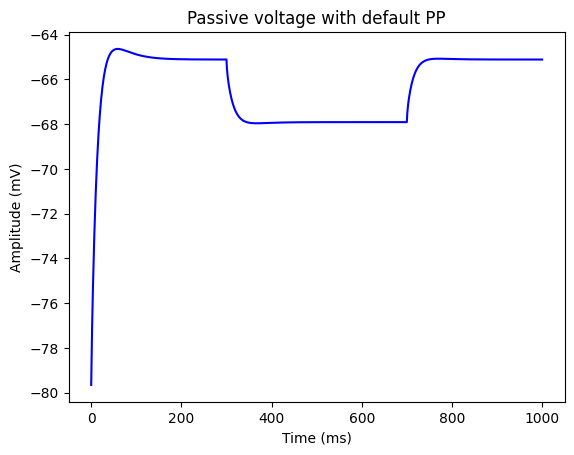

In [5]:
passive_V = np.load("/Users/vladimiromelyusik/ACT/passive/simulation/out_0.npy")

plt.plot(passive_V[::10], c = 'blue')
plt.ylabel("Amplitude (mV)")
plt.xlabel("Time (ms)")
plt.title("Passive voltage with default PP")

In [2]:
computed_soma_area = 5.036323076932052e-06 # (cm2)

user_provided_Rin = 195.4 * 10e6 # (Ohm)
user_provided_tau = 15.6 * 1e-3 # (s)
user_provided_Vrest = -80 # (mV)

In [3]:
spp = ACTPassiveModule.compute_spp(user_provided_Rin, computed_soma_area, user_provided_tau, user_provided_Vrest)
spp.g_bar_h = 0.0017877435830761807
spp

SettablePassiveProperties(Cm=1.5852087355778763, g_bar_leak=0.00010161594458832541, e_rev_leak=-80, g_bar_h=0.0017877435830761807)

In [4]:
cell = ACTCellModel(
    path_to_mod_files = "/Users/vladimiromelyusik/ACT/SST_orig/modfiles",
    passive = ["g_pas", "e_pas", "gbar_Ih"],
    active_channels = [
        "gbar_Nap",
        "gbar_NaTa",
        "gbar_Ca_LVA",
        "gbar_Ca_HVA",
        "gbar_K_T",
        "gbar_Kd",
        "gbar_Kv2like",
        "gbar_SK",
        "gbar_Kv3_1"]
)

In [5]:
# Block all active channels
cell.block_channels(cell.active_channels)

# Set passive properties
cell.set_passive_properties(spp)

# Set the cell builder
cell.set_custom_cell_builder(SSTcellbuilder)

# Apply a negative current injection and get a passive trace
simulator = ACTSimulator(output_folder_name = "passive")
simulator.submit_job(
    cell,
    SimulationParameters(sim_name = "simulation", h_tstop = 1000, CI = [CurrentInjection(type = "constant", amp = -0.01, delay = 300)]))
simulator.run_jobs(1)


        ACTSimulator (2024)
        ----------
        When submitting multiple jobs, note that the cells must share modfiles.
        
warning ./Sst-IRES-Cre_Ai14-188740.03.02.01_657210399_m.swc: more than one tree:
  root at line 4
  root at line 14504
  root at line 14725
  root at line 14798
  root at line 15141
  root at line 15144
  root at line 15156
  root at line 15211
  root at line 15318
  root at line 15496
  root at line 15811
  root at line 15857
  root at line 15883
  root at line 16161
  root at line 16200
  root at line 16210
  root at line 16253
  root at line 16286
  root at line 16301
  root at line 16326
  root at line 16574
  root at line 16613
  root at line 16618
  root at line 16645
  root at line 16695
  root at line 16751
  root at line 16765
  root at line 16768
Soma area (cm2): 5.036323076932052e-06


In [7]:
passive_V = np.load("/Users/vladimiromelyusik/ACT/passive/simulation/out_0.npy")
gpp = ACTPassiveModule.compute_gpp(passive_V, 0.1, 300, 700, -0.01)
gpp

GettablePassiveProperties(R_in=279.21594338700544, tau1=11.5, tau2=53.800000000000004, sag_ratio=0.028550330083950047)